# 成功しているかどうかでEDAする

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandarallel import pandarallel

from transforms.dataframes.is_success import dataframe_is_success
from transforms.dataframes.preprocess import dataframe_preprocess

pandarallel.initialize()

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
DATA = dataframe_is_success(dataframe_preprocess(pd.read_csv("data/kickstarter.csv")))

## とりあえず全体のis_successのヒストグラムを描画する
どちらかというと描画関数を作成するのが目的

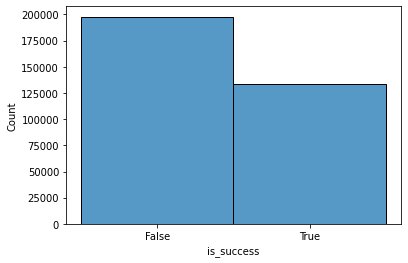

In [3]:
def plot_is_success(df: pd.DataFrame, title: str = None) -> None:
    """成功可否分布の描画

    Args:
        df (pd.DataFrame): 描画に使うdataframe
        title (str, optional): 描画時のグラフタイトル. Defaults to None.
    """
    plt.close()
    sns.histplot(df.is_success.sort_values().astype(str))
    plt.title(title)
    plt.show()

plot_is_success(DATA)

## 期間とかどうだろう
締切日 - 公開日

In [4]:
season = DATA.parallel_apply(
    lambda x: (
        pd.to_datetime(x.deadline).replace(tzinfo=x.launched.tzinfo)
        - pd.to_datetime(x.launched)
    ).days,
    axis=1,
).rename("season")
season


0         58
1         59
2         44
3         29
5         34
          ..
378647    29
378650    26
378651    45
378652    30
378653    27
Name: season, Length: 331675, dtype: int64

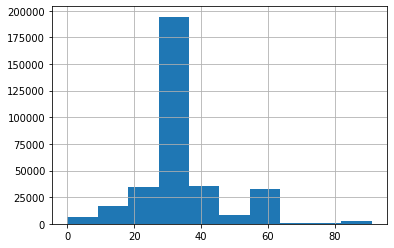

In [5]:
plt.close()
season.hist()
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


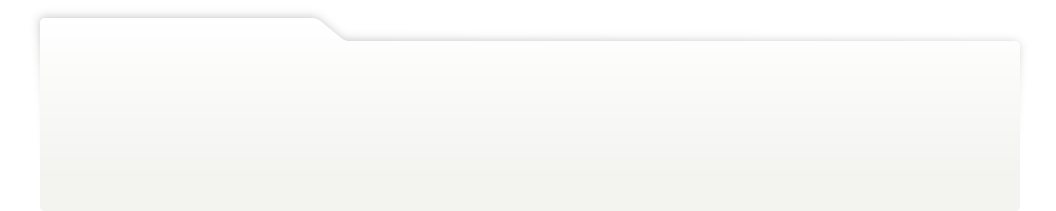
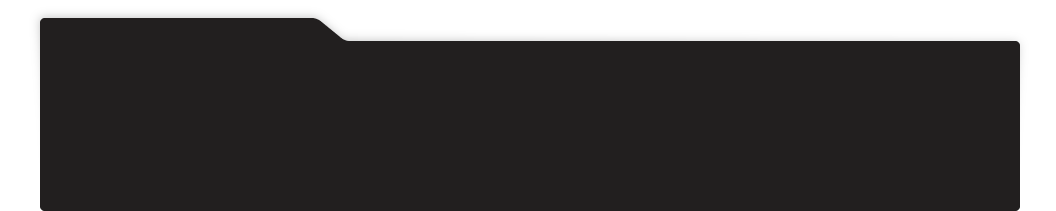
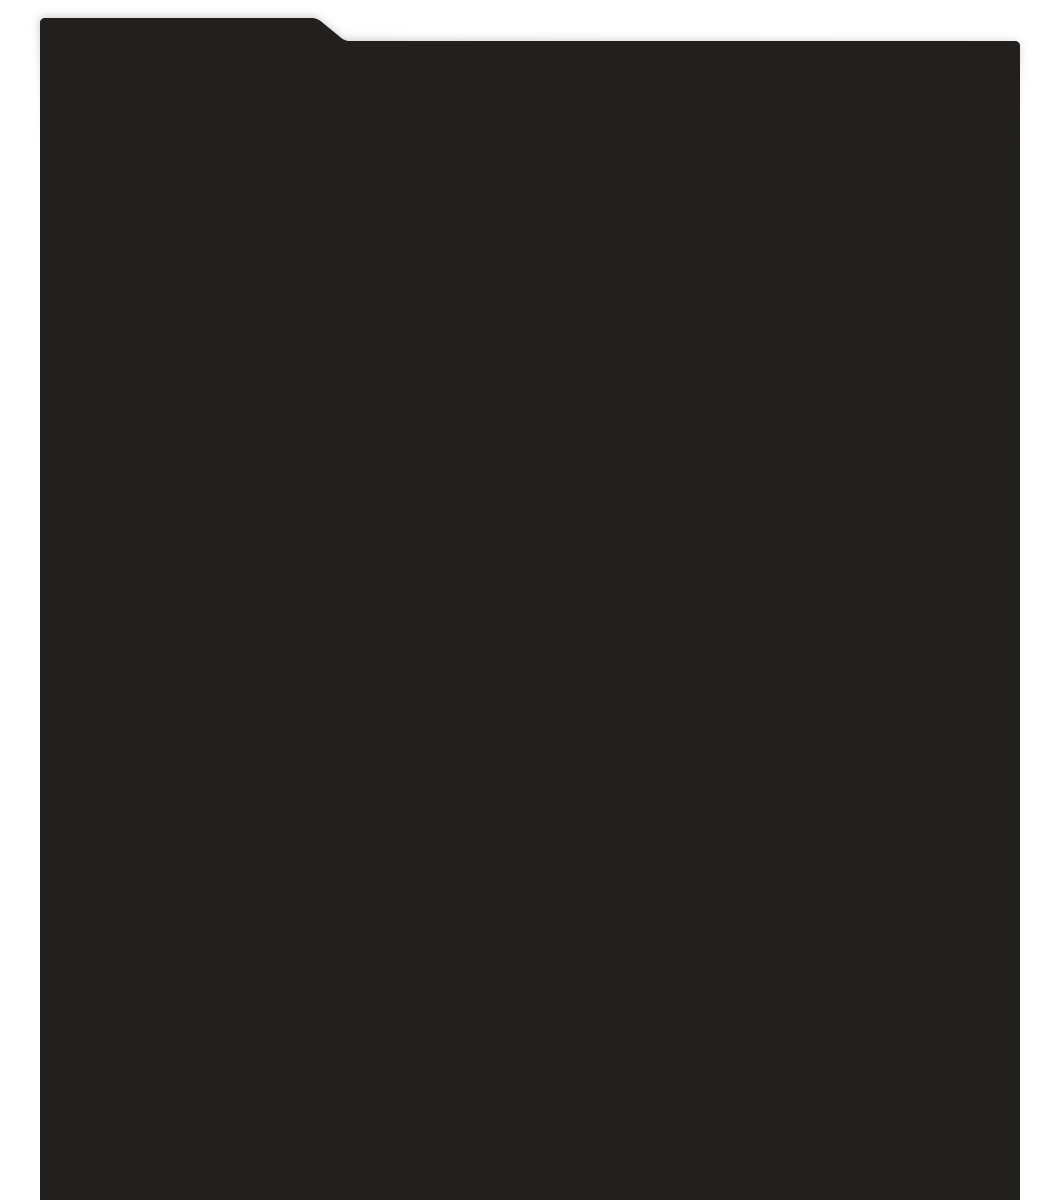
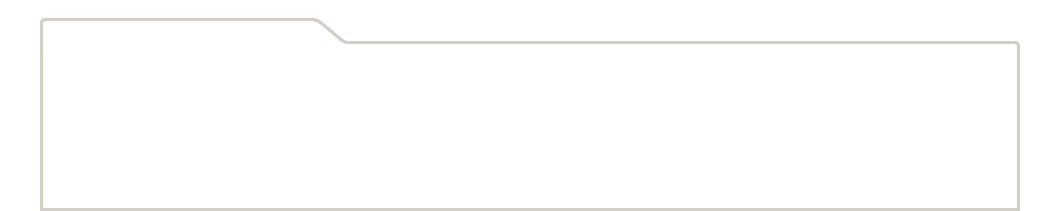
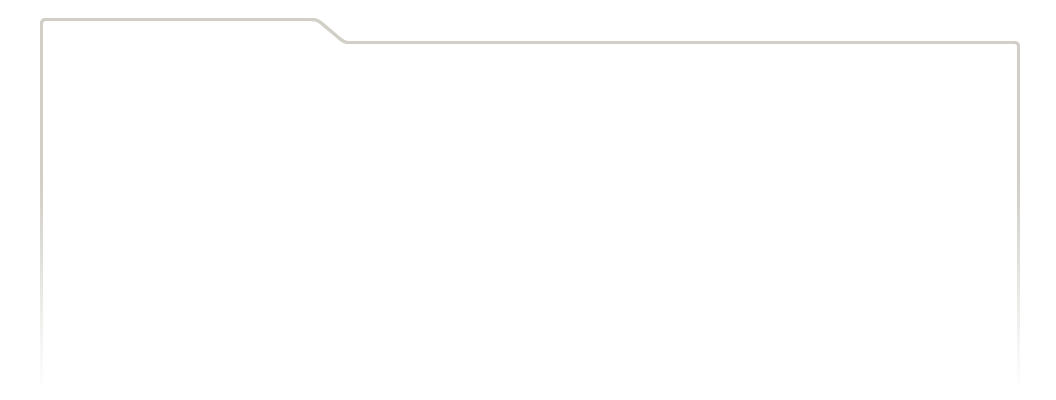
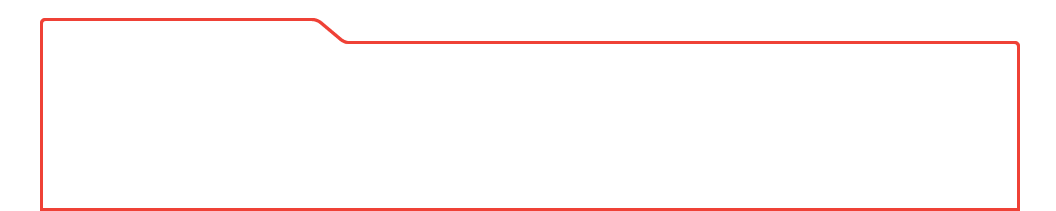
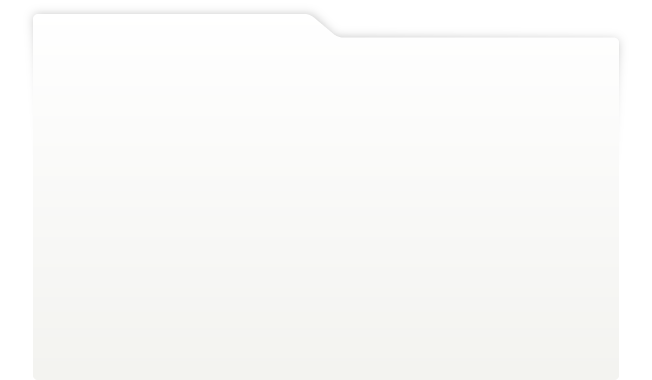
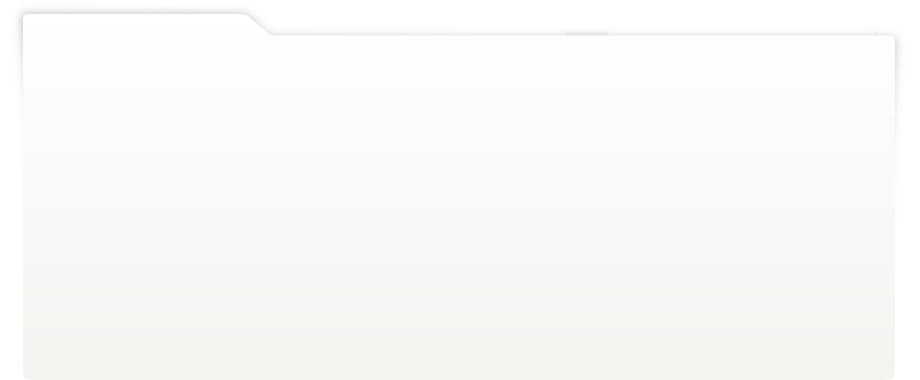
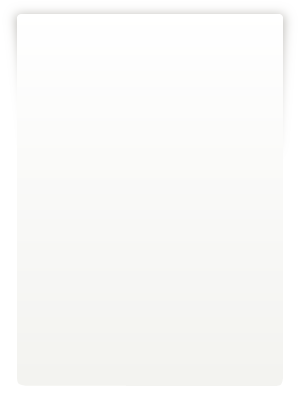
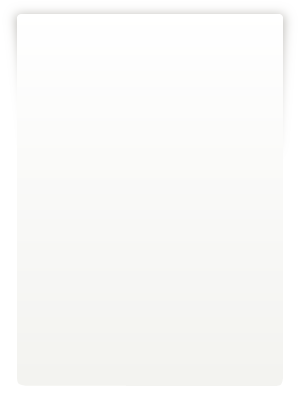
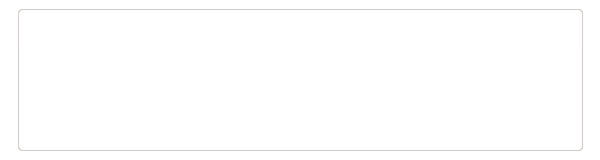
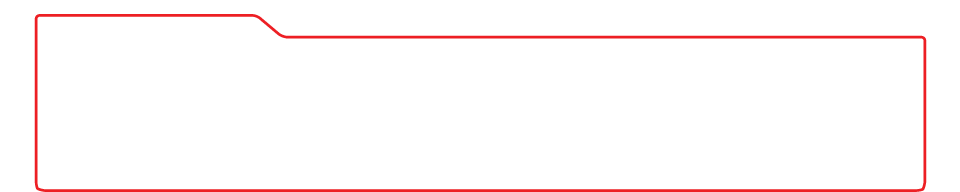
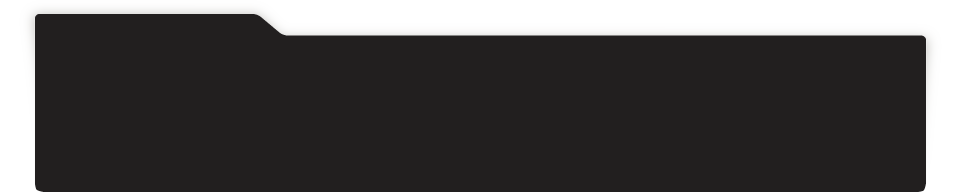
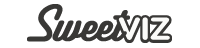
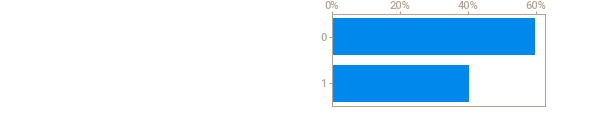
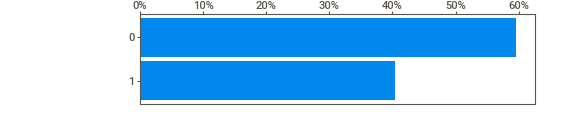
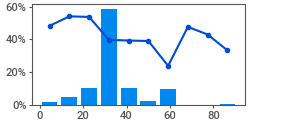
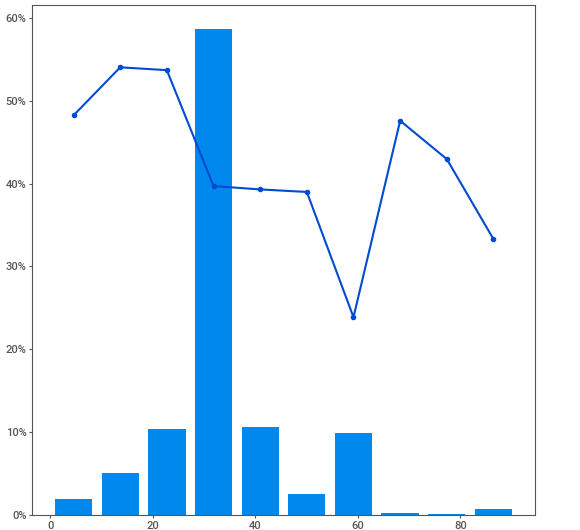
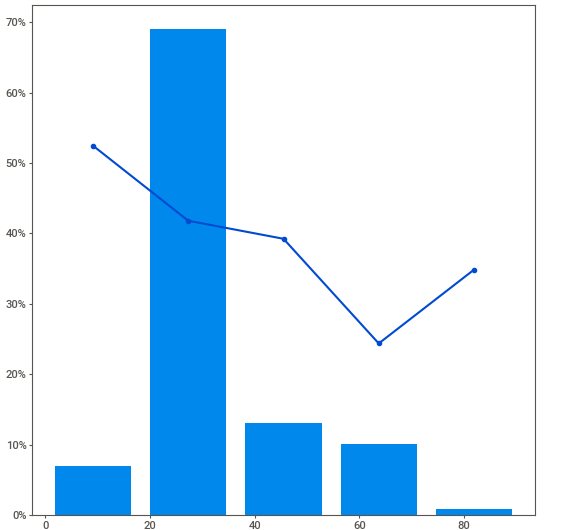
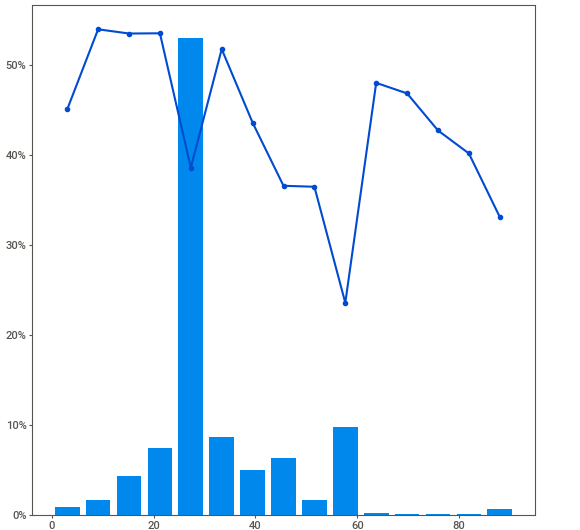
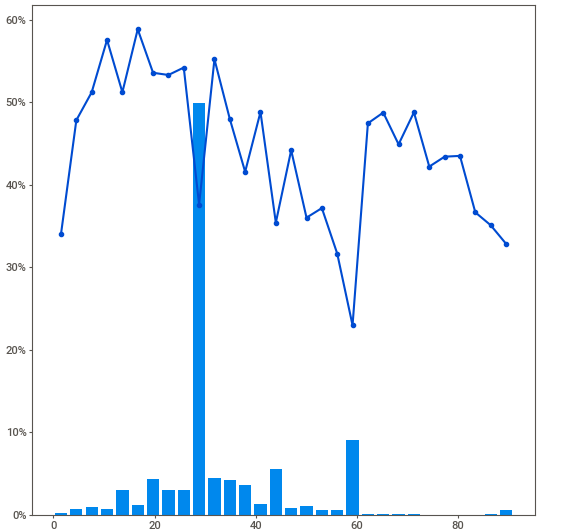

In [6]:
import sweetviz as sv

sv.analyze(
    pd.DataFrame([DATA.is_success, season]).transpose(),
    target_feat="is_success",
    pairwise_analysis="off",
).show_notebook()


### データを見た感想
全体では成功したPJは40%、失敗したPJは60%なので、それよりも大きかったり小さかったりするか
- 期間が30日未満だと全体より成功しやすい（成功率50％程度）
- 40日前後の期間では成功率は全体と同程度
- 期間が60日前後だとなぜか失敗しやすい
- 70日以上の機関になると逆に成功率は上がる

### 考えられる仮説
期間が極端に短い（1ヶ月以内）か極端に長い（2.5ヶ月以上）だと成功しやすい？

なんでだろ…


期間が短いPJ、目標金額も小さかったりして、その結果元々成功しやすいPJなので成功率が上がるとかあるかな
期間が長いPJは…わからん